# **Optical Character Recognition (ORC)**

OCR systems transform a two-dimensional image of text, that could contain machine printed or handwritten text from its image representation into machine-readable text. OCR as a process generally consists of several sub-processes to perform as accurately as possible. 

**Uses of OCR:**

Previously, digitization of documents was achieved by manually typing the text on the computer. Through OCR, this process is made easier as the document can be scanned, processed and the text extracted and stored in an editable form such as a word document.

If you have a document scanner on your phone, such as Adobe Scan, you have probably encountered OCR technology in use.

Airports can also use OCR to automate the process of passport recognition and extraction of information from them.

Other uses of OCR include automation of data entry processes, detection, and recognition of car number plates.

In [7]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,940 kB/s)
debconf: unable to initi

Python-tesseract is an optical character recognition (OCR) tool for python. That is, it will recognize and “read” the text embedded in images.

Python-tesseract is a wrapper for Google’s Tesseract-OCR Engine. It is also useful as a stand-alone invocation script to tesseract, as it can read all image types supported by the Pillow and Leptonica imaging libraries, including jpeg, png, gif, bmp, tiff, and others. Additionally, if used as a script, Python-tesseract will print the recognized text instead of writing it to a file.

In [8]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=751e6d3f0cb582f172e817bb850d341a909d6b916818d7ab19f60d7a882d0a33
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract


In [5]:
from google.colab import files

uploaded = files.upload()

Saving invoice.jpg to invoice.jpg


**Image Pre Processing**

In [18]:
import matplotlib.pyplot as plt
import numpy as np


(1150, 835, 3)
The image consists of 960250 pixels


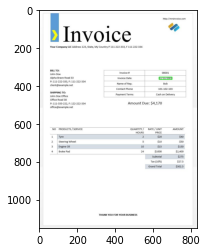

In [20]:
painting=plt.imread("invoice.jpg")
print(painting.shape)
print("The image consists of %i pixels" % (painting.shape[0] * painting.shape[1]))
plt.imshow(painting);

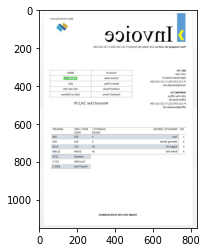

In [21]:
plt.imshow(painting[:,::-1]); 

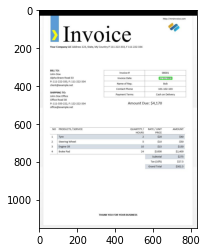

In [22]:
painting2 = painting.copy()    # don't mess the original painting!
painting2[0:30, :, :] = 1.0    # max value for all three components produces white
plt.imshow(painting2);

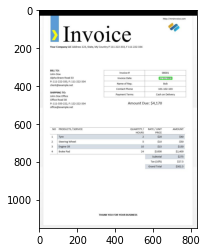

In [23]:
painting2 = painting.copy()    # don't mess the original painting!
painting2[0:30, :, :] = 1.0    # max value for all three components produces white
plt.imshow(painting2);

In [25]:
def fadex(image):
    height, width = image.shape[:2]
    m=np.linspace(0,1, width).reshape(1,width,1)
    result = image*m         # note that we rely on broadcasting here
    return result

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1150, 835, 3)


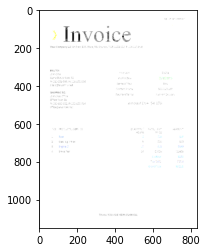

In [26]:
modified=fadex(painting)
print(modified.shape)
plt.imshow(modified);

In [ ]:
Conversion

In [9]:
import cv2 
import pytesseract

img = cv2.imread('invoice.jpg')

# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

'http://mrsinvoice.com\nI *\nYour Company LLC Address 123, State, My Country P 111-222-333, F 111-222-334\nBILL TO:\nP: 111-222-333, F: 111-222-334 z\ncient@eromplent\nContact Phone 101-102-103\njohn Doe office ayment Terms ‘ash on Delivery\nOffice Road 38\nP: 111-333-222, F: 122-222-334 Amount Due: $4,170\noffice@example.net\nNO PRODUCTS / SERVICE QUANTITY / RATE / UNIT AMOUNT\nHOURS: PRICE\n1 tye 2 $20 $40\n2__| Steering Wheel 5 $10 $50\n3 | Engine oil 10 $15 $150\n4 | Brake Pad 24 $1000 $2,400\nSubtotal $275\nTax (10%) $27.5\nGrand Total $302.5\n‘THANK YOU FOR YOUR BUSINESS\n\x0c'

**Getting boxes around text**

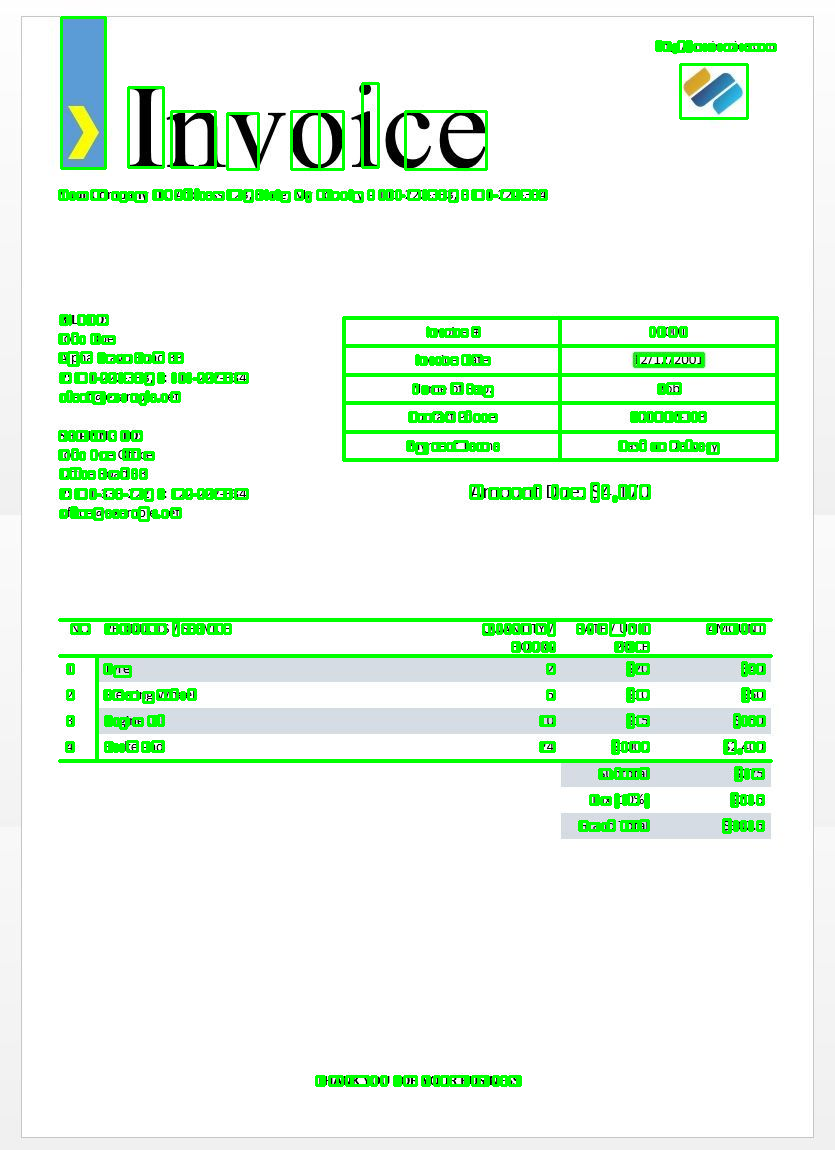

-1

In [ ]:
import cv2
import pytesseract


img = cv2.imread('invoice.jpg')

h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)

In [ ]:
import cv2
import pytesseract
from pytesseract import Output

img = cv2.imread('invoice.jpg')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


**Bounding box information**

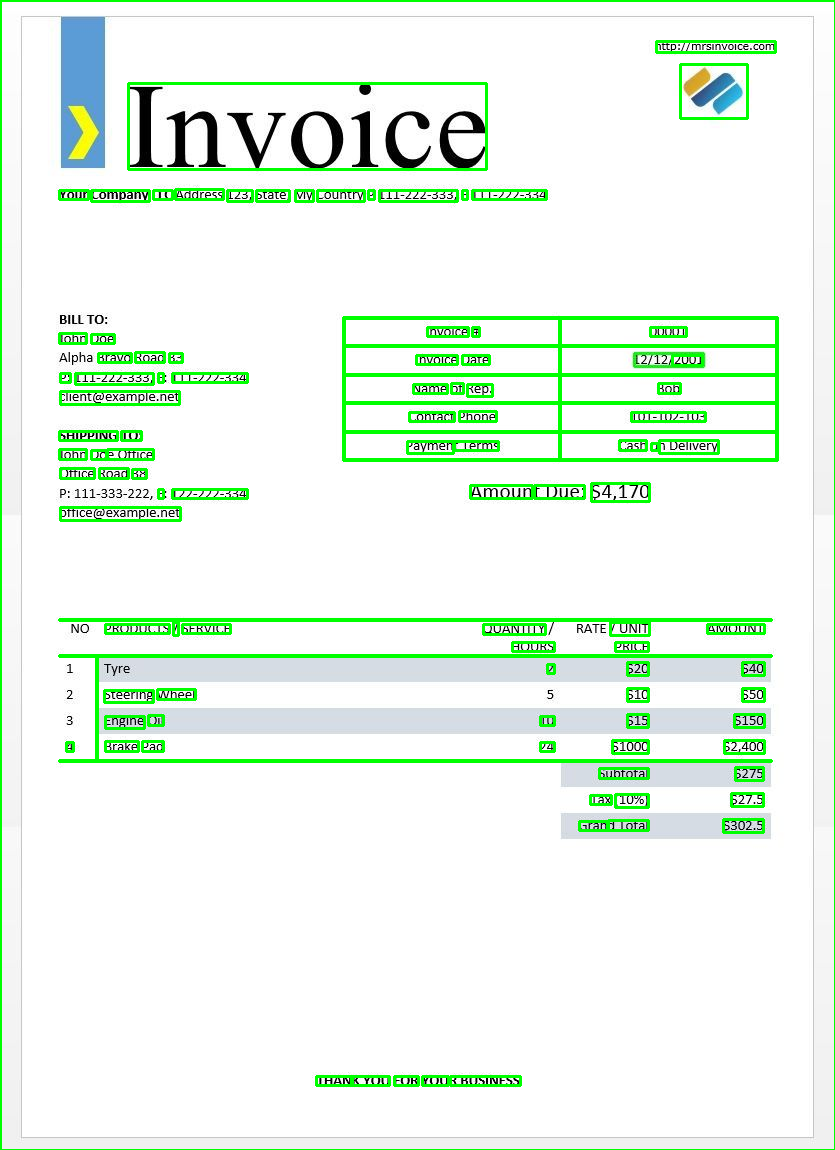

-1

In [ ]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)

Text template matching

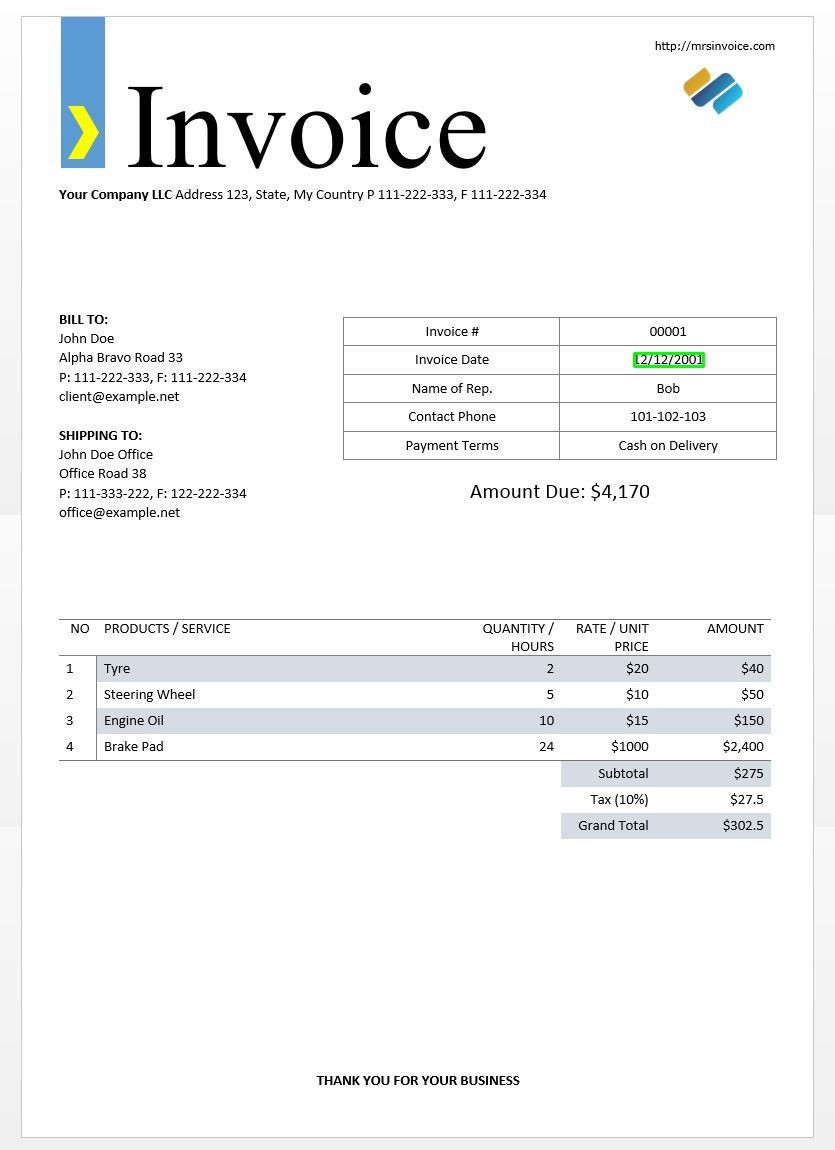

-1

In [ ]:
import re
import cv2
import pytesseract
from pytesseract import Output

img = cv2.imread('invoice.jpg')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d.keys())

date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
    	if re.match(date_pattern, d['text'][i]):
	        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
	        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)